# Processamento do Texto

Esse notebook as funções para fazer o pré-processamento dos textos do diários com foco em extrair uma representação textual dos textos, extração dos termos mais frequentes e análise de similaridade dos textos. 

## Imports Necessários

In [16]:
# !pip install spacy
# !pip install unidecode
# !python -m spacy download pt_core_news_lg
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.manifold import TSNE


In [17]:

# Código para poder usar os módulos implementados nesse repositório no notebook 
import sys, os
path_module = os.path.abspath('../modules/')
if path_module not in sys.path:
    sys.path.append(path_module)

# import preprocess.pre_process_text as pp    

In [18]:
# Imports para o projeto
from sklearn.feature_extraction.text import TfidfVectorizer
from preprocess.pre_process_text import PreProcessText
from preprocess.plot_embeddings import PlotEmbeddings
# from nlp.extract_topics import ExtractTopics
from bertopic import BERTopic
from utils.process_gazette import ProcessGazette


## Processamento do Texto

In [19]:
pe = PlotEmbeddings("pt_core_news_lg")

In [20]:
pp = PreProcessText("pt_core_news_lg")

In [21]:
# tokens_teste = pp.process_text("Hoje visitei a velha estação de trem. A estação estava coberta de abandono. Porque, hoje, as pessoas parecem não dar bola para construções velhas como essa da estação de trem. Muitas pessoas só querem saber de coisas futuras. Dão bola só para coisas novas.")

In [22]:
# texto_teste1 = ' '.join(tokens_teste)

In [23]:
# vetorizador = TfidfVectorizer()
# print(texto_teste1)

In [24]:
# vetor_tfidf = vetorizador.fit_transform([texto_teste1])

In [25]:
# indices_palavras_frequentes1 = vetor_tfidf.toarray().argsort()[0][-5:][::-1]
# palavras_frequentes1 = [vetorizador.get_feature_names()[i] for i in indices_palavras_frequentes1]

In [26]:
# print(palavras_frequentes1)

## Processamento do Diário Teste

In [38]:
from bertopic import BERTopic

pp = PreProcessText("pt_core_news_lg")

class ExtractTopics:
    def __init__(self):
        self.bert_model = BERTopic(language="portuguese", min_topic_size=2)

    def extract_topics(self, texts):
        # Certifique-se de que 'texts' seja uma lista de documentos
        if not isinstance(texts, list):
            raise ValueError("O argumento 'texts' deve ser uma lista de documentos.")

        # Ajuste o modelo BERTopic com os documentos
        model_ = self.bert_model.fit_transform(texts)
        topics = model_.get_topics()

        return topics


In [28]:
pg = ProcessGazette(BASE_DIR="gazettes/")
all_pages = pg.break_pages("2927408_20231019_0.txt","ANO [X|V|I]+ ")

In [29]:
topics_ = {}
for page, texto_teste in all_pages.items():
    topics_[page] = {'text': texto_teste, 'topics': []}

In [41]:
#tokens_ = pp.process_text(topics_[1]['text'])
tokens_ = pp.process_text(topics_[1]['text'])
print(tokens_)

TypeError: unhashable type: 'slice'

In [31]:
texto = ' '.join(tokens_)
vetorizador = TfidfVectorizer()

In [39]:
extractor = ExtractTopics()

In [ ]:
print(texto)

Executivo decreto financeiro controladoria municipio Secretaria Municipal fazenda Municipal tributo secretaria Municipal gestao Secretaria Municipal educacao Secretaria Municipal Secretaria Municipal promocao social combater pobreza esporte Secretaria Municipal mobilidade superintendencia transito salvador Transalvador secretaria Municipal publico Secretaria Municipal inovacao tecnologia comite Municipal tecnologia informacao comunicacao licitacao Secretaria Municipal gestao Secretaria Municipal educacao Secretaria Municipal Secretaria Municipal mobilidade superintendencia transito salvador Transalvador secretaria Municipal manutencao cidade companhia desenvolvimento urbano salvador contrato Secretaria Municipal gestao Secretaria Municipal educacao Secretaria Municipal Secretaria Municipal promocao social combater pobreza esporte Secretaria Municipal politica mulher infancia juventude Secretaria Municipal cultura turismo secult fundacao gregorio Mattos secretaria Municipal mobilidade s

In [ ]:
vetor_tfidf = vetorizador.fit_transform([texto])

In [ ]:
#ordeno os indices do vetor tfidf e pego os 10 maiores, 0 seria a unica linha que tenho, 50 mais relevantes, -1 para inverter a ordem
indices_palavras_frequentes = vetor_tfidf.toarray().argsort()[0][-100:][::-1]
palavras_frequentes = [vetorizador.get_feature_names()[i] for i in indices_palavras_frequentes]

In [ ]:
print(indices_palavras_frequentes)

[43 56 55 41 66 29 19  7 59 61 62 63 12 28 31 40 22 15 39 34 47 49 65  5
 52  3 57 58 25 17 16 20 18 10 14 13 11  9  8  6  4  2  1 21 33 23 24 64
 60 54 53 51 50 48 46 45 44 42 38 37 36 35 32 30 27 26  0]


In [ ]:
print(palavras_frequentes)

['municipal', 'secretaria', 'salvador', 'mobilidade', 'urbano', 'gestao', 'educacao', 'companhia', 'superintendencia', 'tecnologia', 'transalvador', 'transito', 'cultura', 'fundacao', 'gregorio', 'mattos', 'esporte', 'desenvolvimento', 'manutencao', 'inovacao', 'pobreza', 'promocao', 'turismo', 'combater', 'publico', 'cidade', 'secult', 'social', 'fazenda', 'diverso', 'diario', 'eletronico', 'edital', 'controladoria', 'defesa', 'decreto', 'convenio', 'contrato', 'comunicacao', 'comite', 'codesal', 'bem', 'bahia', 'empresa', 'informacao', 'estar', 'executivo', 'tributo', 'sustentabilidade', 'resiliencia', 'quinta', 'publicacao', 'protecao', 'politica', 'outubro', 'oficial', 'municipio', 'mulher', 'limpurb', 'limpeza', 'licitacao', 'juventude', 'infancia', 'governanca', 'financeiro', 'feira', 'animal']


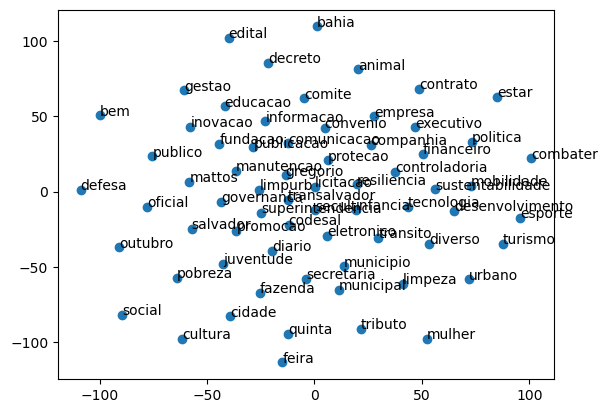

In [ ]:
pe.plot_embeddings(palavras_frequentes)